<a href="https://colab.research.google.com/github/california-19/Springboard/blob/master/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Springboard/Data_Files/adult.csv"
df = pd.read_csv(path)

#Cleaning the data
We will remove missing data from the whole dataframe.

In [ ]:
df.head()

age workclass  fnlwgt  ... hours.per.week  native.country income
0   90         ?   77053  ...             40   United-States  <=50K
1   82   Private  132870  ...             18   United-States  <=50K
2   66         ?  186061  ...             40   United-States  <=50K
3   54   Private  140359  ...             40   United-States  <=50K
4   41   Private  264663  ...             40   United-States  <=50K

[5 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# The columns capital.loss, capital.gain and fnlwgt are deemed unnecassary in training the model and removed from dataset.
df.drop('capital.loss', axis='columns', inplace=True)
df.drop('capital.gain', axis='columns', inplace=True)
df.drop('fnlwgt', axis='columns', inplace=True)

In [ ]:
df.head()

age workclass     education  ...  hours.per.week native.country income
0   90         ?       HS-grad  ...              40  United-States  <=50K
1   82   Private       HS-grad  ...              18  United-States  <=50K
2   66         ?  Some-college  ...              40  United-States  <=50K
3   54   Private       7th-8th  ...              40  United-States  <=50K
4   41   Private  Some-college  ...              40  United-States  <=50K

[5 rows x 12 columns]

In [ ]:
# Missing values in workclass, native.country and occupation are removed. Not many missing entries, so we didn't lose much
z1 = df['workclass'] == '?'
z2 = df['native.country'] == '?'
z3 = df['occupation'] == '?'
df.drop(df[z1].index, inplace=True)
df.drop(df[z2].index, inplace=True)
df.drop(df[z3].index, inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


age workclass     education  ...  hours.per.week native.country income
1   82   Private       HS-grad  ...              18  United-States  <=50K
3   54   Private       7th-8th  ...              40  United-States  <=50K
4   41   Private  Some-college  ...              40  United-States  <=50K
5   34   Private       HS-grad  ...              45  United-States  <=50K
6   38   Private          10th  ...              40  United-States  <=50K

[5 rows x 12 columns]

In [ ]:
# Since we are looking if people are making more than 50K, we have to drop part-time workers. They will not compete with full time workers.
filt = df['hours.per.week'] < 30
df.drop(df[filt].index, inplace=True)

In [ ]:
# We drop education column too, since we have number of education years
df.drop('education', axis='columns', inplace=True)
df.head()

age    workclass  education.num  ... hours.per.week native.country income
3   54      Private              4  ...             40  United-States  <=50K
4   41      Private             10  ...             40  United-States  <=50K
5   34      Private              9  ...             45  United-States  <=50K
6   38      Private              6  ...             40  United-States  <=50K
8   68  Federal-gov              9  ...             40  United-States  <=50K

[5 rows x 11 columns]

In [ ]:
# We rename some of the columns for convenience
df.rename(columns={'native.country':'country','marital.status':'m_status', 'education.num':'edu', 'hours.per.week':'hours_per_week'}, inplace=True)

In [ ]:
# We want to focus on people who were born in the States for cross-target variable analysis
df.drop(df[df.country != 'United-States'].index, inplace=True)

In [ ]:
df['country'].value_counts()

United-States    24374
Name: country, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# We want to convert strings into numerical codes. We use LabelEncoder of sklearn for this.
le_workclass = LabelEncoder()
le_marital_status = LabelEncoder()
le_occupation = LabelEncoder()
le_relationship = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_income = LabelEncoder()

In [ ]:
df['workclass_n'] = le_workclass.fit_transform(df['workclass'])
df['m_status_n'] = le_marital_status.fit_transform(df['m_status'])
df['occupation_n'] = le_occupation.fit_transform(df['occupation'])
df['relationship_n'] = le_relationship.fit_transform(df['relationship'])
df['race_n'] = le_race.fit_transform(df['race'])
df['sex_n'] = le_sex.fit_transform(df['sex'])
df['income_n'] = le_income.fit_transform(df['income'])

In [ ]:
# After making the transformation we get rid of old data
df.drop(['workclass', 'm_status', 'occupation', 'relationship', 'race', 'sex', 'income'], axis='columns', inplace=True)
df.head()

age  edu  hours_per_week  ... race_n  sex_n  income_n
3   54    4              40  ...      4      0         0
4   41   10              40  ...      4      0         0
5   34    9              45  ...      4      0         0
6   38    6              40  ...      4      1         0
8   68    9              40  ...      4      0         0

[5 rows x 11 columns]

In [ ]:
# We don't need country too, since we only have United States
df.drop('country', axis='columns', inplace=True)
df.head()

age  edu  hours_per_week  ...  race_n  sex_n  income_n
3   54    4              40  ...       4      0         0
4   41   10              40  ...       4      0         0
5   34    9              45  ...       4      0         0
6   38    6              40  ...       4      1         0
8   68    9              40  ...       4      0         0

[5 rows x 10 columns]

In [ ]:
df.workclass_n.unique()


array([2, 0, 4, 3, 5, 1, 6])

In [ ]:
# We transformed the variables but I don't know what these numbers correspond to. Therefore, I do an inverse transformation to get the mapping.
print(le_workclass.inverse_transform([0, 1, 2, 3, 4, 5, 6]))
print(le_marital_status.inverse_transform([0, 1, 2, 3, 4, 5, 6]))
print(le_occupation.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]))
print(le_relationship.inverse_transform([0, 1, 2, 3, 4, 5]))
print(le_race.inverse_transform([0, 1, 2, 3, 4]))
print(le_sex.inverse_transform([0, 1]))
print(le_income.inverse_transform([0, 1]))

['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']
['<=50K' '>50K']


# Model #1
Target variable is Income

In [ ]:
# We will keep the original dataframe df and we will choose different target variables in different decision tree models
# The inputs will change accordingly
# Potential target variables are income, edu, relationship_n, m_status_n
# We call this Model 1
target_inc = df['income_n']
inputs_inc = df.drop('income_n', axis='columns')

In [ ]:
# Model 2
target_edu = df['edu']
inputs_edu = df.drop('edu', axis='columns')
# Model 3
target_rel = df['relationship_n']
inputs_rel = df.drop('relationship_n', axis='columns')
# Model 4
target_mar = df['m_status_n']
inputs_mar = df.drop('m_status_n', axis='columns')

This is what we are going to do:
We have 10 variables. We will single out one of the four target variables, income-education-relationship-marital_status, one by one. Then we will try to explain the target variable with the remaining 9 inputs.
In the second part, we will exclude three variables, income-education-martial_status, from the dataset and try to explain them with the remaining 7 variables, one by one.

In [ ]:
from sklearn import tree

In [ ]:
# We split the data now
from sklearn.model_selection import train_test_split
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(inputs_inc, target_inc, test_size=0.2, random_state=19)
print( X_train_inc.shape, y_train_inc.shape)
print( X_test_inc.shape, y_test_inc.shape)

(19499, 9) (19499,)
(4875, 9) (4875,)


In [ ]:
# We split the data every target variable. We use a random state to make sure that we have the same random states to compare our results.
X_train_edu, X_test_edu, y_train_edu, y_test_edu = train_test_split(inputs_edu, target_edu, test_size=0.2, random_state=19)
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(inputs_rel, target_rel, test_size=0.2, random_state=19)
X_train_mar, X_test_mar, y_train_mar, y_test_mar = train_test_split(inputs_mar, target_mar, test_size=0.2, random_state=19)

In [ ]:
model_inc = tree.DecisionTreeClassifier()
model_edu = tree.DecisionTreeClassifier()
model_rel = tree.DecisionTreeClassifier()
model_mar = tree.DecisionTreeClassifier()

In [ ]:
model_inc.fit(X_train_inc, y_train_inc)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_edu.fit(X_train_edu, y_train_edu)
model_rel.fit(X_train_rel, y_train_rel)
model_mar.fit(X_train_mar, y_train_mar)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# The model is not perfect and even the training set is not 100% accurate
model_inc.score(X_train_inc, y_train_inc)

0.963382737576286

In [ ]:
print(model_inc.score(X_test_inc, y_test_inc))
print(model_edu.score(X_test_edu, y_test_edu))
print(model_rel.score(X_test_rel, y_test_rel))
print(model_mar.score(X_test_mar, y_test_mar))

0.7462564102564102
0.3058461538461538
0.7437948717948718
0.7856410256410257


# Conclusion
Looking at the scores, our data is worst at predicting education level. All the other scores are very close to each other. Therefore, it would not be appropriate to rank them. But contrary to my initial guess of education being a dependent variable, our test results do not support this view. Education is more like a determinant of other outcomes, rather than being an outcome of other variables.


The lines after this are extra. I tried other things in my model.

Streaming output truncated to the last 5000 lines.
6881 [label="gini = 0.0\nsamples = 14\nvalue = [14, 0]"] ;
6880 -> 6881 ;
6882 [label="X[0] <= 48.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
6880 -> 6882 ;
6883 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6882 -> 6883 ;
6884 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
6882 -> 6884 ;
6885 [label="X[5] <= 11.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
6879 -> 6885 ;
6886 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
6885 -> 6886 ;
6887 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
6885 -> 6887 ;
6888 [label="X[0] <= 43.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
6878 -> 6888 ;
6889 [label="X[5] <= 5.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
6888 -> 6889 ;
6890 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6889 -> 6890 ;
6891 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6889 -> 6891 ;
6892 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
6888 -> 6892 ;
6893 [label="X[1] <= 5.

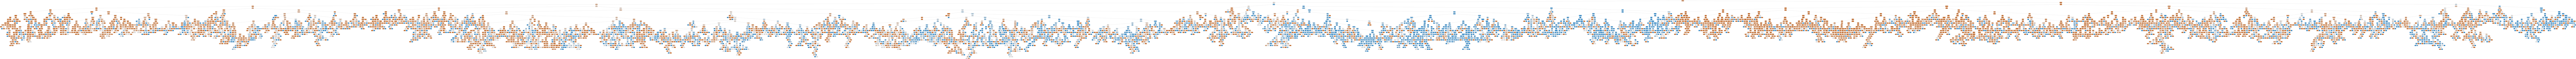

In [ ]:
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(model_inc, None))

#Create Dot Data
dot_data = tree.export_graphviz(model_inc, out_file=None, feature_names=list(X_train_inc.columns.values), 
                                class_names=['Something', 'Something else'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
y_pred_inc = model_inc.predict(X_test_inc)

In [ ]:
y_pred_edu = model_edu.predict(X_test_edu)
y_pred_rel = model_rel.predict(X_test_rel)
y_pred_mar = model_mar.predict(X_test_mar)

In [ ]:
compare = pd.DataFrame({'Actual':y_test_rel, 'Predicted':y_pred_rel})
compare

Actual  Predicted
28121       0          0
29591       0          0
13815       1          1
6588        4          1
7120        4          1
...       ...        ...
9590        0          0
14816       1          1
457         0          0
29225       1          3
29710       1          1

[4875 rows x 2 columns]

Model 1 result. Predicting income level.
Success rate is about 75%

In [ ]:
#from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_inc, y_pred_inc))
# Our model is predicting three fourth of the data correctly

Mean Absolute Error: 0.25374358974358974
